In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### Load data 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
#description of dataset
print (load_breast_cancer()["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
load_breast_cancer()["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [36]:
X= pd.DataFrame(data= load_breast_cancer()["data"], columns= load_breast_cancer()["feature_names"])
y = load_breast_cancer()["target"]

### EDA 

In [39]:
from collections import Counter
Counter(y)

Counter({0: 212, 1: 357})

In [40]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

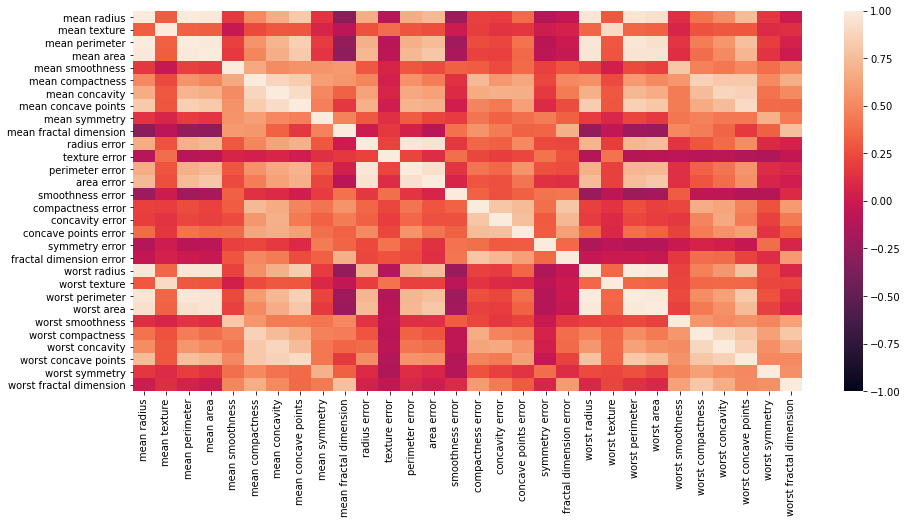

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(X.corr(), vmin = -1, vmax = 1)

### model setup 

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
X_train.shape

(398, 30)

In [46]:
X_test.shape

(171, 30)

In [47]:
y_train.shape

(398,)

### Support Vector Machine 

In [48]:
from sklearn.svm import SVC   #Support Vector Classifier

##### default params 

In [49]:
## using default parameters 
svc = SVC()

In [50]:
svc.fit(X_train,y_train)  

SVC()

In [52]:
y_pred = svc.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print( confusion_matrix(y_test, y_pred), "\n" ) 
print (classification_report(y_test,y_pred))

[[ 56  10]
 [  3 102]] 

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



### Gridspec   - identifying the best params  

In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
params = {"C": [0.1,1,5,10,100,1000], "gamma":[1,0,1, 0.01, 0.001, 0.0001] }

In [61]:
grid = GridSearchCV(SVC() , param_grid=params, verbose= 3) 

In [62]:
grid.fit(X_train, y_train)  # will automatically use the best esitmator

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0 ..................................................
[CV] ...................... C=0.1, gamma=0, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0 ..................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........................ C=5, gamma=1, score=0.625, total=   0.0s
[CV] C=5, gamma=1 ....................................................
[CV] ........................ C=5, gamma=1, score=0.633, total=   0.0s
[CV] C=5, gamma=1 ....................................................
[CV] ........................ C=5, gamma=1, score=0.633, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.637, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.637, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.613, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] ..................... C=5, gamma=0.01, score=0.633, total=   0.0s
[CV] C=5, gamma=0.01 .................................................
[CV] .

[CV] ...................... C=100, gamma=1, score=0.633, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.637, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.637, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.613, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.633, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=0.633, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .................. C=100, gamma=0.001, score=0.887, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100, 1000],
                         'gamma': [1, 0, 1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [64]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [63]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [65]:
y_pred = grid.predict(X_test)

In [67]:
print(confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test,y_pred)) 

[[ 59   7]
 [  4 101]] 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# slightly better